### Selenium库

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium import webdriver
from tqdm import tqdm
from selenium.webdriver.chrome.options import Options
ranges = 100
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=chrome_options)
driver.get('https://etc.usf.edu/lit2go/books/')

In [2]:
stories = driver.find_elements(By.CSS_SELECTOR,"section>figure")[:ranges]

In [3]:
story_list = []
for item in stories:
    story = item.find_element(By.TAG_NAME,'a')
    story_link = story.get_attribute('href')
    story_list.append(story_link)

In [ ]:
with open('resource/data.txt','w') as f:    #设置文件对象
    for item in tqdm(story_list):
        driver.get(item)
        par = driver.find_elements(By.CSS_SELECTOR,'dl>dt')
        texts = driver.find_elements(By.CSS_SELECTOR,'dl>dd')
        num = 0
        for subitem in par:
            dt = subitem.find_element(By.TAG_NAME,'a')
            title = dt.get_attribute('text')
            text = texts[num].text
            num += 1
            f.write(title+'\n'+text+'\n\n')   

### Python词云(wordcloud库等)

In [1]:
with open('resource/data.txt','r',errors = 'ignore') as f:
    novel_string = f.read()

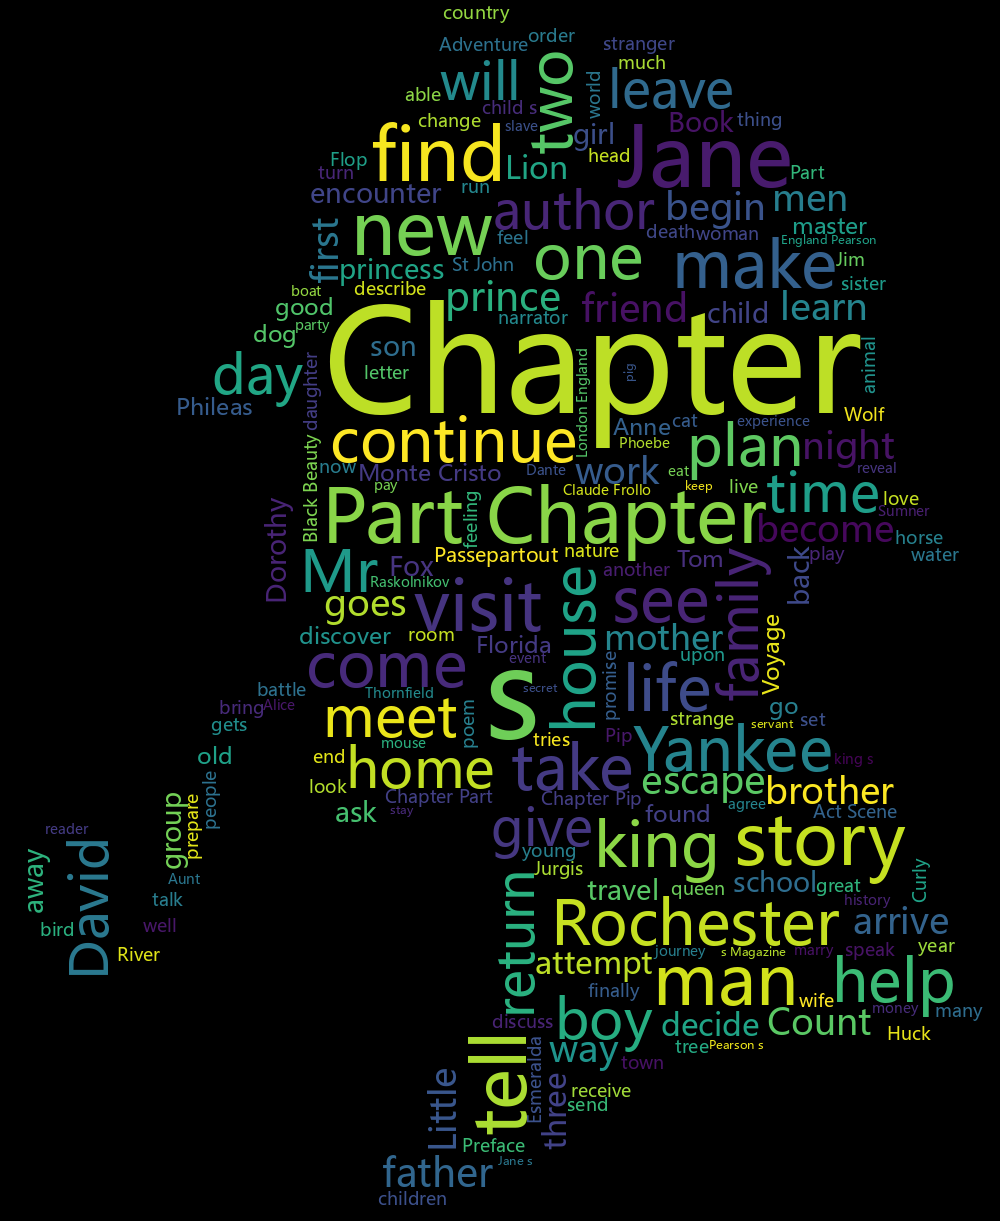

In [7]:
import jieba
from wordcloud import WordCloud 
import numpy as np
from PIL import Image
mask=np.array(Image.open("mask/man.png"))
wcd=WordCloud(font_path="fonts/msyh.ttc",mask=mask,background_color="black") 
ss=" ".join(jieba.lcut(novel_string))
wcd.generate(ss)
wcd.to_image()

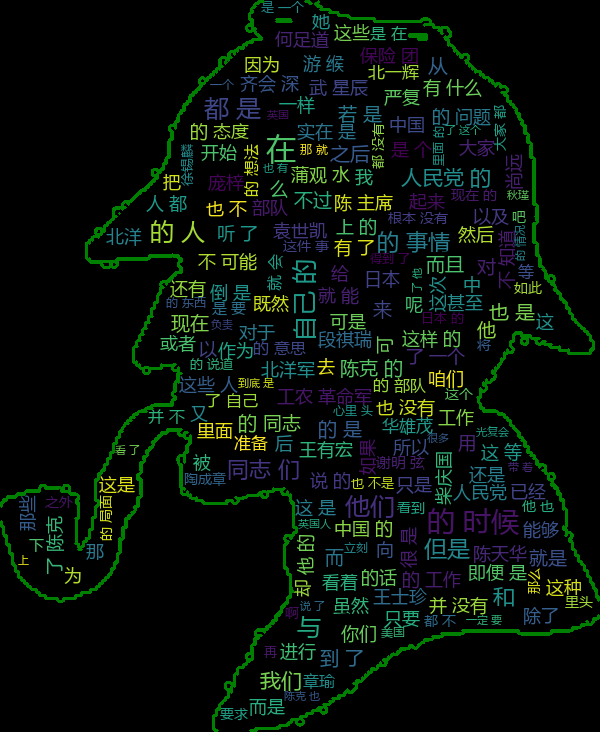

In [9]:
#修改scale,max_font_size,min_font_size
from wordcloud import WordCloud
import jieba
import numpy as np
from PIL import Image
with open('data/小说.txt','r',errors = 'ignore',encoding='gb2312') as f:
    novel_string = f.read()
mask=np.array(Image.open("mask/man.png"))
wcd=WordCloud(font_path="fonts/msyh.ttc",mask=mask,background_color="black",
              contour_width=2,contour_color="green",scale=0.6,max_font_size=50,min_font_size=4)
ss=" ".join(jieba.lcut(novel_string))
wcd.generate(ss)
wcd.to_image()

### Python自然语言处理: (jieba库)

In [10]:
with open('data/小说.txt','r',errors = 'ignore',encoding='gb2312') as f:
    novel_string = f.read()

In [11]:
## jieba
import jieba
import jieba.analyse
import jieba.posseg as pseg
print(jieba.lcut(novel_string[-190:]))#返回直观的list

['\u3000', '\u3000', '看', '了', '看', '天际', '，', '在', '工作', '中', '熬过', '无数', '不眠之夜', '的', '陈克', '很', '轻松', '的', '判断', '出', '，', '再', '过', '一阵', '，', '黎明', '就', '将', '驱逐', '黑夜', '制造', '的', '混沌', '之影', '，', '黎明', '时分', '的', '赤色', '霞光', '会', '把', '这', '本来', '就', '充满', '色彩', '的', '世界', '染上', '鲜艳', '的', '金', '红色', '，', '伴随', '着', '太阳', '的', '升起', '，', '五星红旗', '也', '会', '冉冉升起', '。', '\n', '\u3000', '\u3000', '涂抹', '在', '一切', '之上', '的', '赤色', '很快', '会', '被', '紧跟', '而', '来', '白昼', '所', '驱散', '，', '在', '那个', '时候', '，', '无法', '阻挡', '的', '，', '每', '一个', '人', '都', '能', '清晰', '的', '看到', '陈克', '，', '而且', '能够', '看清', '陈克', '。', '\n', '\u3000', '\u3000', '陈克', '静静的', '站', '在', '观礼台', '上', '，', '等待', '着', '那一刻', '的', '来临', '。']


In [12]:
text = novel_string[-190:]
print(jieba.analyse.extract_tags(text,topK=10))
print(jieba.analyse.textrank(text,topK=10))
#withWeight返回得分，两种算法得分不同
print(jieba.analyse.extract_tags(text,topK=10,withWeight=True))
print(jieba.analyse.textrank(text,topK=10,withWeight=True))
#allowPOS仅包括指定词性的词，这是一个元组
print(jieba.analyse.extract_tags(text,topK=10,allowPOS=('n')))
print(jieba.analyse.textrank(text,topK=10,allowPOS=('n')))
print(jieba.analyse.extract_tags(text,topK=10,allowPOS=('n','a')))
print(jieba.analyse.textrank(text,topK=10,allowPOS=('n','a')))

['陈克', '赤色', '黎明', '之影', '观礼台', '冉冉升起', '不眠之夜', '五星红旗', '熬过', '天际']
['赤色', '能够', '时候', '工作', '等待', '染上', '红色', '太阳', '伴随', '黑夜']
[('陈克', 0.8983905518105264), ('赤色', 0.3777257345964912), ('黎明', 0.281408584757193), ('之影', 0.2124371611), ('观礼台', 0.2124371611), ('冉冉升起', 0.19522963034561405), ('不眠之夜', 0.1931632613), ('五星红旗', 0.1860498383508772), ('熬过', 0.17388936149842107), ('天际', 0.17118496360666666)]
[('赤色', 1.0), ('能够', 0.9977554461042824), ('时候', 0.9968617702234596), ('工作', 0.9934182365197717), ('等待', 0.9934182365197717), ('染上', 0.7985228409882946), ('红色', 0.7541745835463696), ('太阳', 0.7495641098646791), ('伴随', 0.7436748177726326), ('黑夜', 0.671554833852044)]
['赤色', '观礼台', '天际', '霞光', '染上', '黑夜', '时分', '色彩', '红色', '无法']
['染上', '霞光', '时候', '赤色', '无法', '时分', '色彩', '世界', '红色']
['赤色', '观礼台', '天际', '霞光', '染上', '混沌', '鲜艳', '黑夜', '时分', '轻松']
['染上', '鲜艳', '色彩', '世界', '霞光', '黑夜', '时候', '赤色', '混沌', '无法']


### Python自然语言处理: (gensim库)

In [13]:
#检验是否含有中文字符
def is_contains_chinese(strs):
    for _char in strs:
        if '\u4e00' <= _char <= '\u9fa5':
            return True
    return False

In [14]:
with open('data/小说.txt','r',errors = 'ignore',encoding='gb2312') as f:
    novel_string_list = f.read()

In [15]:
novel_split = novel_string_list.split('\n\n')

In [16]:
title_list = []
body_list = []
temp = ''
for item in novel_split:
    if is_contains_chinese(item):
        break
    if item.startswith('\n'):
        title_list.append(item)
        body_list.append(temp)
        temp = ''
    else:
        temp += item

In [17]:
nbody_list = []
ntitle_list = []
for item in body_list:
    if item != '':
        nbody_list.append(item)
for item in title_list:
    if item != '':
        ntitle_list.append(item)

In [18]:
import os
import gensim

In [19]:
def read_corpus(f, tokens_only=False):
    for i, line in enumerate(f):
        tokens = gensim.utils.simple_preprocess(line)
        print(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [21]:
## body
train_corpus = list(read_corpus(nbody_list))
## title
test_corpus = list(read_corpus(ntitle_list, tokens_only=True))

The Wolf and the LambWOLF, meeting  with a  Lamb astray  from the  fold, resolved  not to lay violent hands on him, but to find some plea  to justify to the Lamb the Wolf's right  to eat him.  He thus  addressed him: "Sirrah, last  year you grossly insulted  me." "Indeed," bleated the Lamb in a mournful  tone of voice, "I was not then  born." Then said the Wolf, "You feed in my pasture."  "No, good sir," replied the Lamb, "I have not  yet tasted grass."   Again said the  Wolf, "You drink  of my well." "No," exclaimed the Lamb, "I never yet drank water, for as yet my mother's  milk is both food and drink to me."  Upon  which the Wolf seized him and ate him  up, saying, "Well! I won't remain supperless, even though you refute every one of my imputations."  The tyrant will always find a pretext for his tyranny.
A BAT who fell upon the ground and  was caught by a Weasel pleaded to be  spared his life.  The  Weasel refused, saying  that he was  by nature the  enemy of all birds.  The Bat as

In [90]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=64, min_count=4, epochs=124)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [91]:
def get_similar_doc(doc_id, ifprint=False):
    inferred_vector = model.infer_vector(test_corpus[doc_id])
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    if ifprint:
        print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
        print('Similar Documents:')
        for i, s in enumerate(sims):
            print('{}, {}, {}'.format(i, s, ' '.join(train_corpus[s[0]].words)))
    for i,item in enumerate(sims):
        if item[0] == doc_id:
            return i

In [102]:
sum_i = []
for i in range(min(len(train_corpus),len(test_corpus))):
    sum_i.append(get_similar_doc(i))
print(f'平均搜索排名: {sum(sum_i)/len(train_corpus)}')
print(f'最佳搜索排名: {min(sum_i),sum_i.index(min(sum_i))}')
print(f'最差搜索排名: {max(sum_i),sum_i.index(max(sum_i))}')

平均搜索排名: 96.18055555555556
最佳搜索排名: (0, 63)
最差搜索排名: (287, 208)


In [100]:
import random
doc_id = 85
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
for i,item in enumerate(sims):
    if item[0] == doc_id:
        print(i)
        break
# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0),(f'actual:{i}', i),('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

3
Test Document (85): «the fir tree and the bramble»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec<dm/m,d64,n5,w5,mc4,s0.001,t3>:

MOST (18, 0.6504717469215393): «the pomegranate and apple tree disputed as to which was the most beautiful when their strife was at its height bramble from the neighboring hedge lifted up its voice and said in boastful tone pray my dear friends in my presence at least cease from such vain disputings»

actual:3 (85, 0.606070876121521): «fir tree said boastingly to the bramble you are useful for nothing at all while am everywhere used for roofs and houses the bramble answered you poor creature if you would only call to mind the axes and saws which are about to hew you down you would have reason to wish that you had grown up bramble not fir tree better poverty without care than riches with»

MEDIAN (229, 0.3476870059967041): «the north wind and the sun disputed as to which was the most powerful and agreed that he should be declared the victor who could first stri